In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [2]:
x=pd.read_csv("train_earth.csv")
y=pd.read_csv("train_earth_lables.csv")

In [3]:
data=x.merge(y,on="building_id")

# EDA

In [4]:
data.shape

(260601, 40)

In [5]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
data.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


# Insights :

Dataset contains ~260,000 buildings

39 features + 1 target (damage_grade)

Mix of numerical, categorical & binary variables

In [7]:
data.dtypes.value_counts()

int64     32
object     8
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Numerical: geo_level, age, floors, etc.

Categorical: foundation_type, roof_type, etc.

Binary: has_superstructure_*

In [9]:
data.isnull().sum().sort_values(ascending=False)


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

No missing values → dataset is high quality.

In [4]:
data["damage_grade"].value_counts(normalize=True)


damage_grade
2    0.568912
3    0.334680
1    0.096408
Name: proportion, dtype: float64

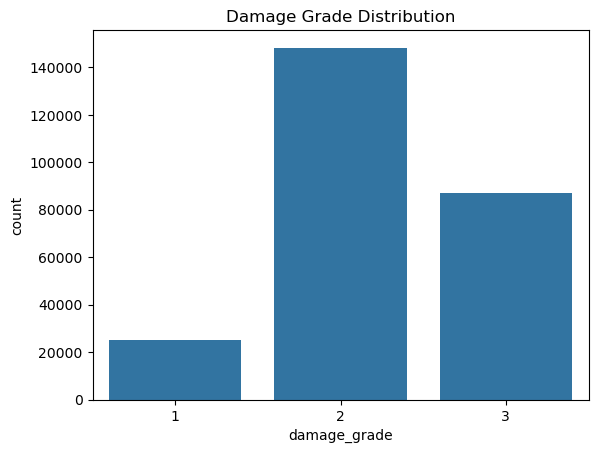

In [11]:
sns.countplot(x="damage_grade", data=data)
plt.title("Damage Grade Distribution")
plt.show()


# Insights:

Data is imbalanced

Damage grade 2 & 3 dominate

Class imbalance justifies SMOTE

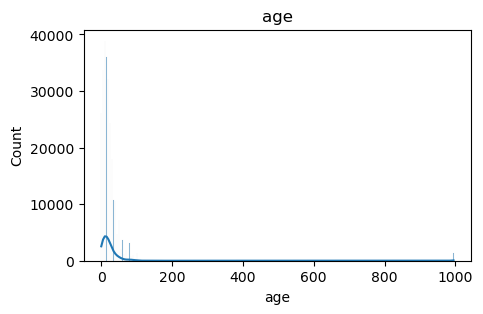

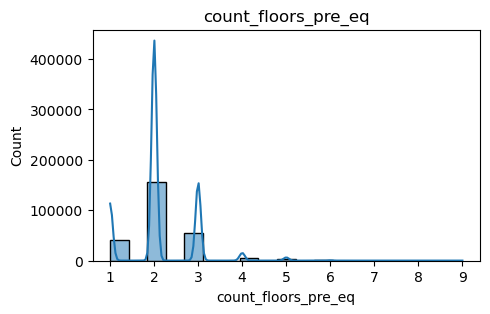

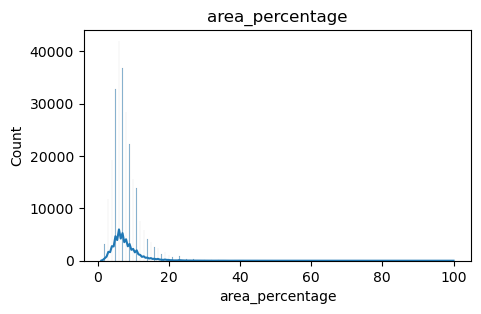

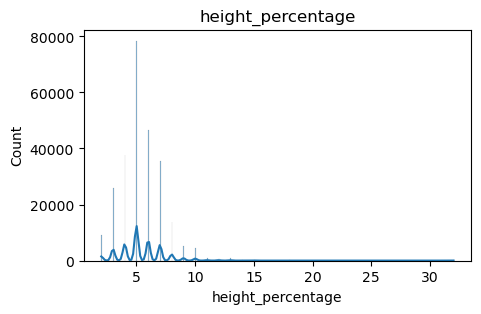

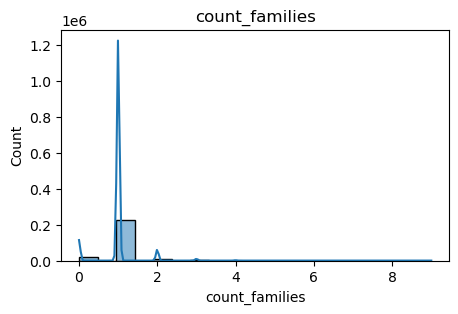

In [143]:
num_cols = [
    "age",
    "count_floors_pre_eq",
    "area_percentage",
    "height_percentage",
    "count_families"
]

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()



# Insights
age is right-skewed

Taller buildings show higher damage risk

Older buildings → more damage

In [137]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.describe()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

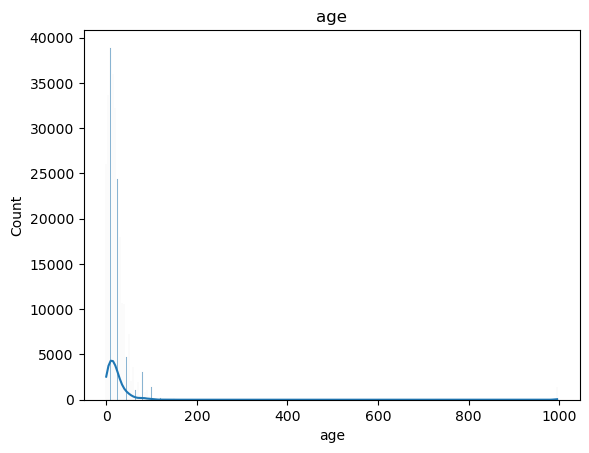

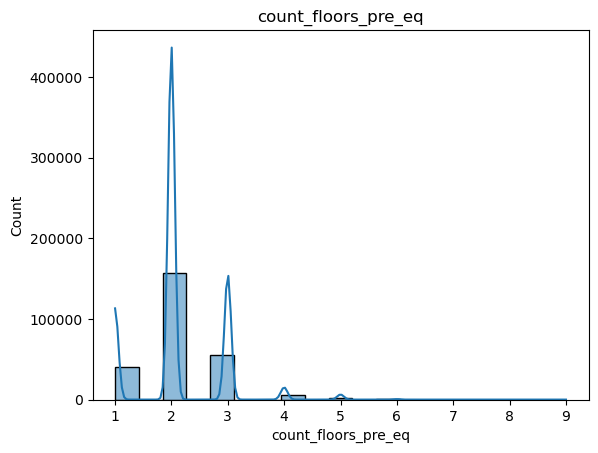

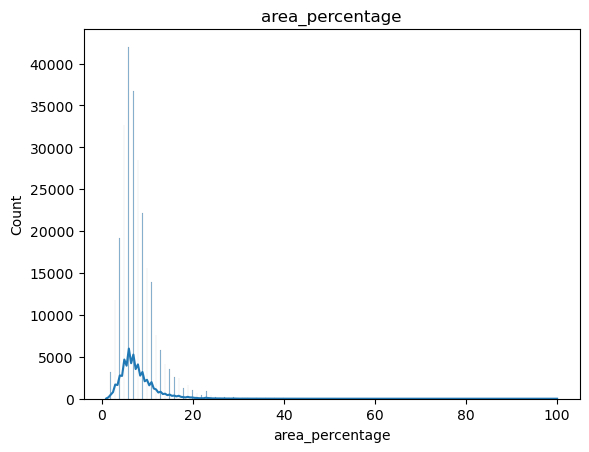

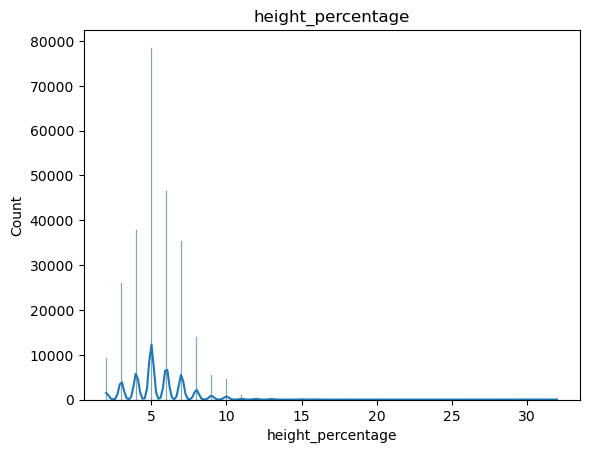

In [13]:
num_cols = ["age", "count_floors_pre_eq", "area_percentage", "height_percentage"]

for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()


In [5]:
x=data.drop(["building_id","damage_grade"],axis=1)
y=data["damage_grade"]

In [6]:
cat_col=x.select_dtypes(include="O")
num_col=x.select_dtypes(include=["int","float"])

In [7]:
for i in num_col:
    
    a=x[i].skew()
    print(a)


0.2725303547889289
0.028957381391945855
0.00039351208989124153
0.8341129585700061
12.192494218852833
3.5260823142261435
1.8082617571733322
2.894530020077062
-1.2300395912700481
5.1149826431955665
7.201350444931503
3.427233210061134
3.2198316414144004
1.1242929552135028
2.9759316828457427
4.530386709900795
7.75051744092648
7.9844322094724935
1.634757873477747
2.4625604205888525
3.549955340586051
5.174349474228261
10.975364669452556
32.56824684470774
52.62493045461501
30.51336679989762
72.9071267692457
82.79492805789297
106.43123954327197
13.869406373746337


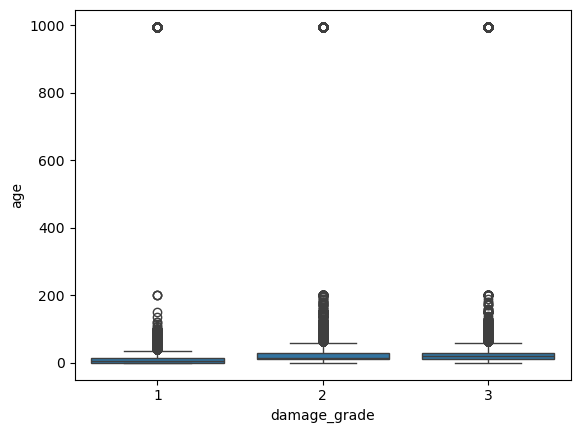

In [18]:
sns.boxplot(x="damage_grade", y="age", data=data)
plt.show()


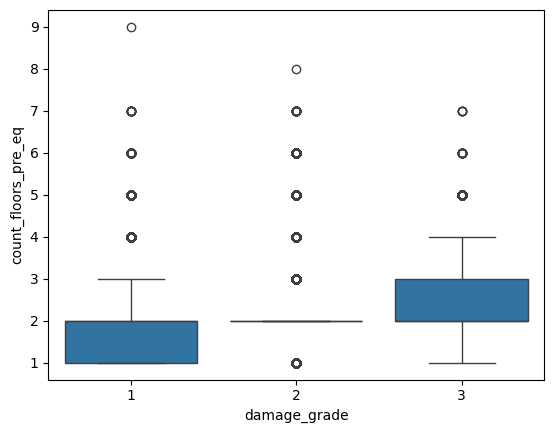

In [79]:
sns.boxplot(x="damage_grade", y="count_floors_pre_eq", data=data)
plt.show()


In [12]:
pd.crosstab(data["foundation_type"], data["damage_grade"], normalize="index")


damage_grade,1,2,3
foundation_type,,,
h,0.247238,0.399862,0.352901
i,0.567539,0.411570,0.020890
r,0.048906,0.572615,0.378479
u,0.258696,0.598948,0.142356
w,0.287935,0.613176,0.098889


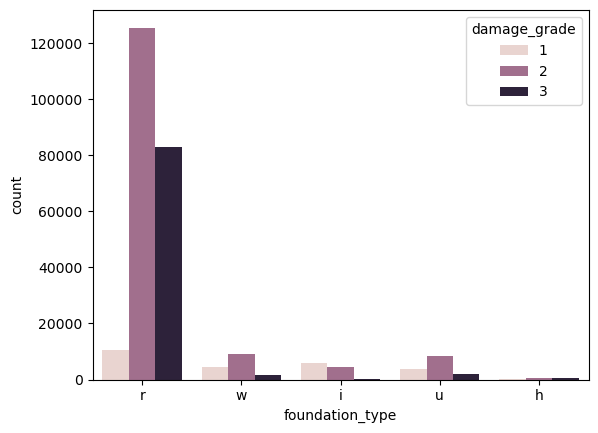

In [26]:
sns.countplot(x="foundation_type", hue="damage_grade", data=data)
plt.show()


In [8]:
super_cols = [col for col in data.columns if "has_superstructure" in col]

data[super_cols].sum().sort_values(ascending=False)


has_superstructure_mud_mortar_stone       198561
has_superstructure_timber                  66450
has_superstructure_adobe_mud               23101
has_superstructure_bamboo                  22154
has_superstructure_cement_mortar_brick     19615
has_superstructure_mud_mortar_brick        17761
has_superstructure_rc_non_engineered       11099
has_superstructure_stone_flag               8947
has_superstructure_cement_mortar_stone      4752
has_superstructure_rc_engineered            4133
has_superstructure_other                    3905
dtype: int64

In [80]:
data[num_cols].corr()

,age,count_floors_pre_eq,area_percentage,height_percentage
age,1.000000,0.086668,-0.004323,0.061074
count_floors_pre_eq,0.086668,1.000000,0.101071,0.772734
area_percentage,-0.004323,0.101071,1.000000,0.196645
height_percentage,0.061074,0.772734,0.196645,1.000000


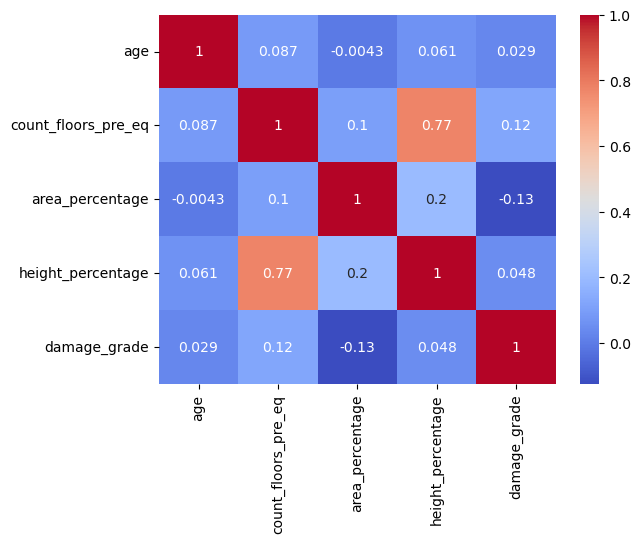

In [81]:
corr = data[num_cols + ["damage_grade"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


<Axes: xlabel='damage_grade', ylabel='count'>

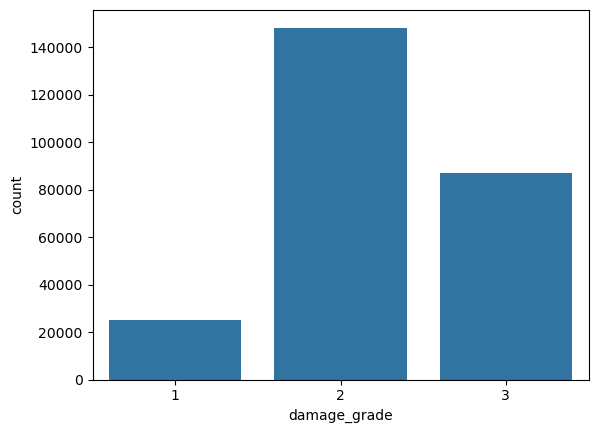

In [82]:
sns.countplot(x=y)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'count_floors_pre_eq'}>],
       [<Axes: title={'center': 'area_percentage'}>,
        <Axes: title={'center': 'height_percentage'}>]], dtype=object)

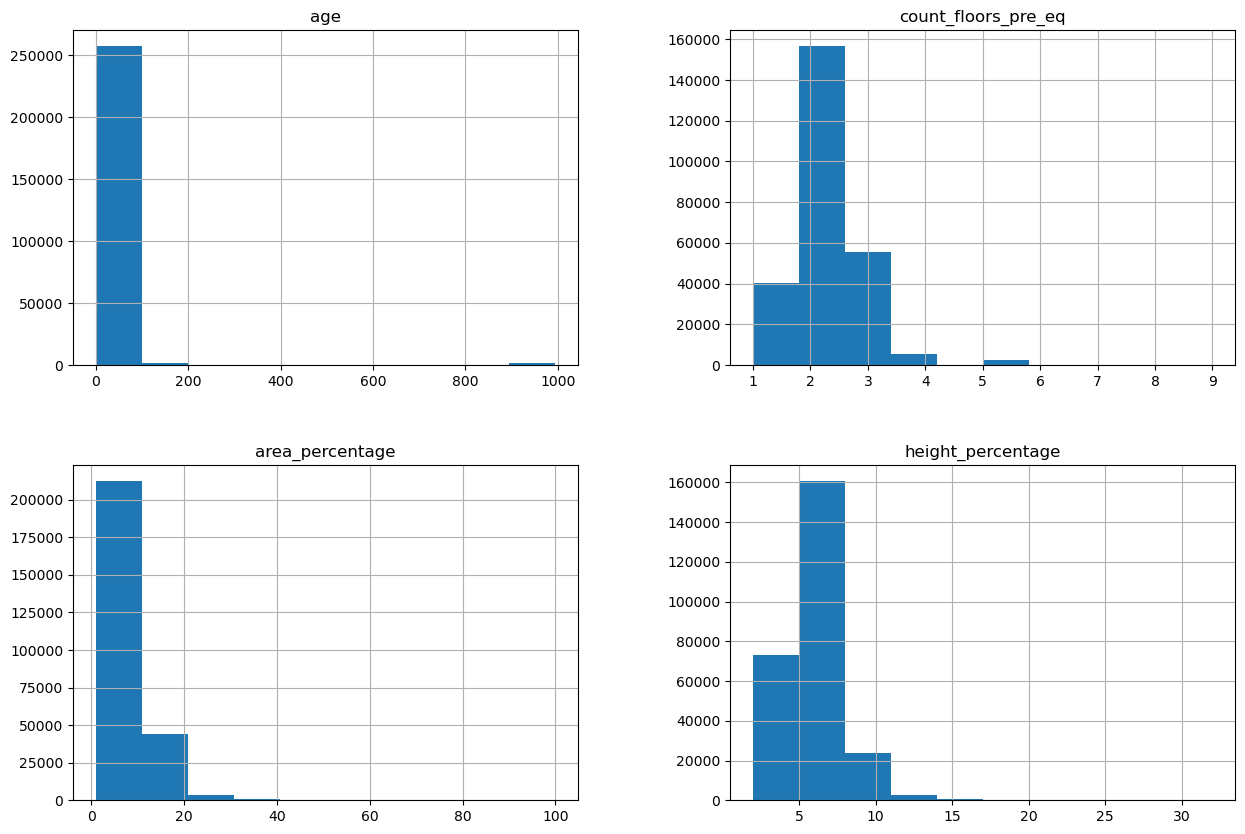

In [84]:
data[num_cols].hist(figsize=(15,10))


<Axes: xlabel='damage_grade', ylabel='age'>

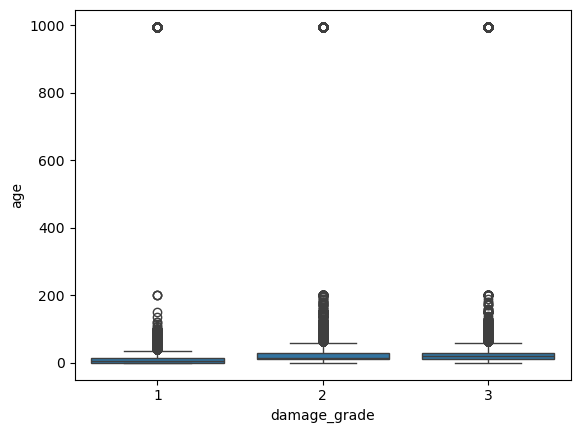

In [125]:
sns.boxplot(x="damage_grade", y="age", data=data)


<Axes: xlabel='foundation_type', ylabel='count'>

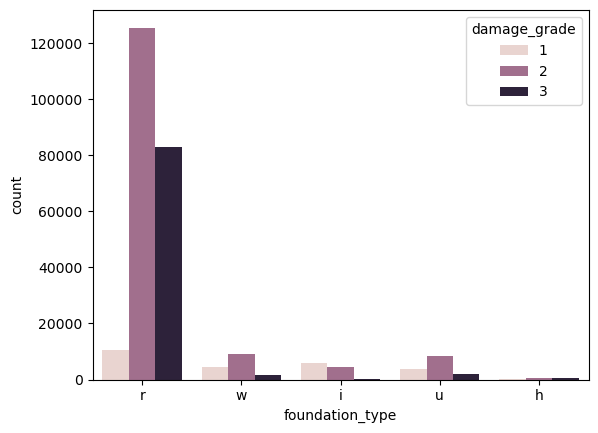

In [126]:
sns.countplot(x="foundation_type", hue="damage_grade", data=data)


# insight
Weak foundations → severe damage

## EDA Conclusion
Exploratory Data Analysis reveals that earthquake damage is strongly influenced by building age, height, number of floors, foundation type, and construction material. The dataset is imbalanced with damage grade 2 dominating, which justifies the use of resampling techniques and tree-based models. Skewness in numerical features motivates power transformations for improved model performance.

In [9]:
x=data.drop(["building_id","damage_grade"],axis=1)
y=data["damage_grade"]

# data cleaning

In [27]:
x

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
260597,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
260598,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
260599,26,39,1851,2,10,14,6,t,r,x,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## null values

In [10]:
x.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

## outliers

In [10]:
cat_col=x.select_dtypes(include="O")
num_col=x.select_dtypes(include=["int","float"])

In [11]:
cat_col.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

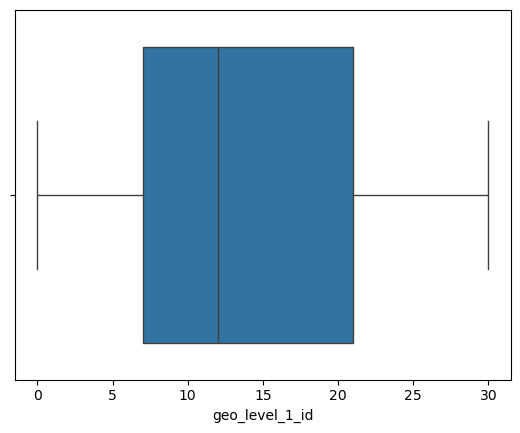

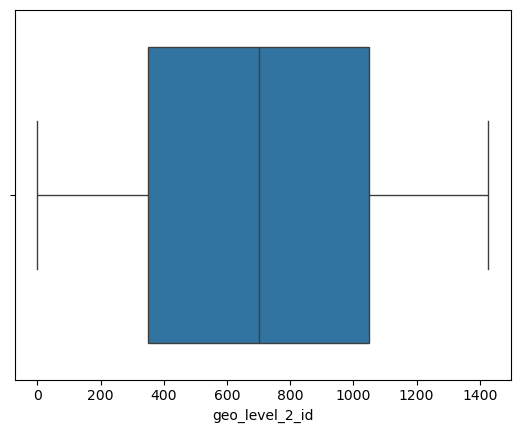

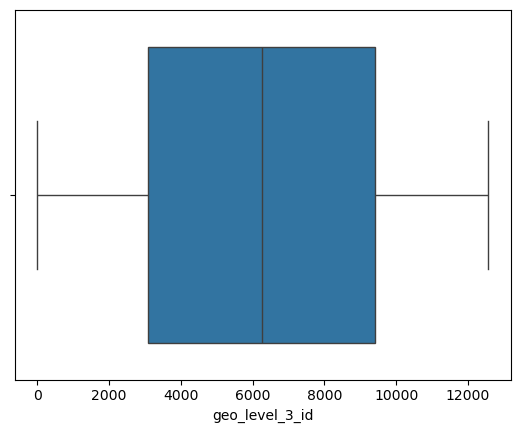

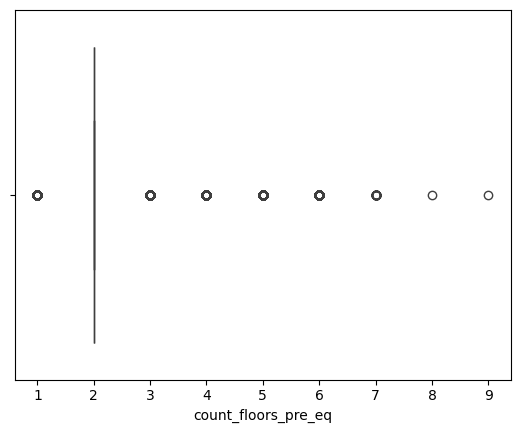

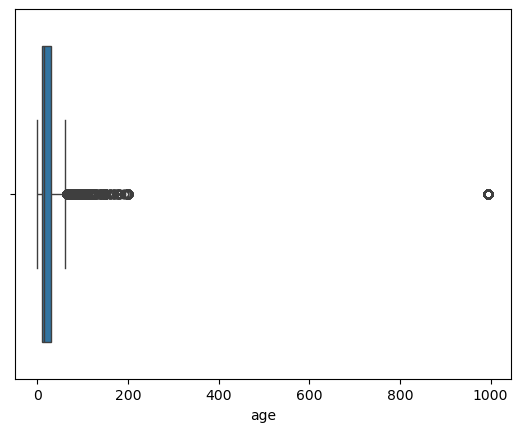

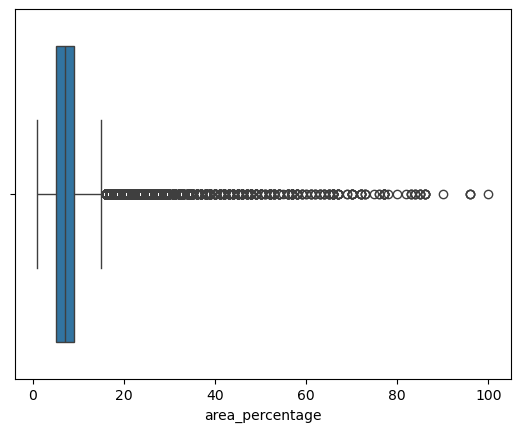

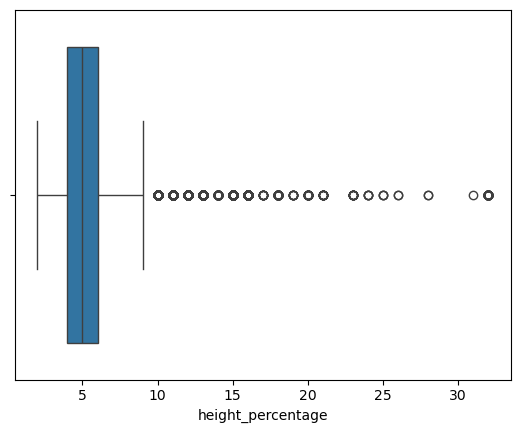

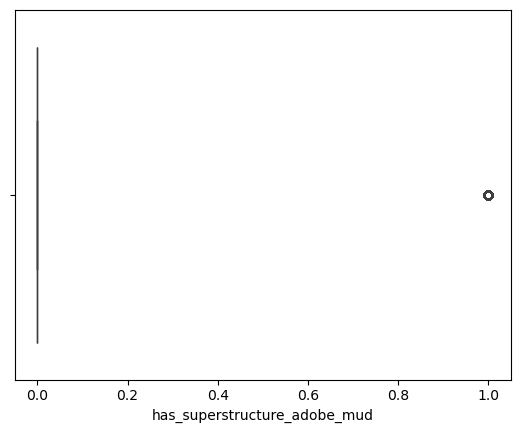

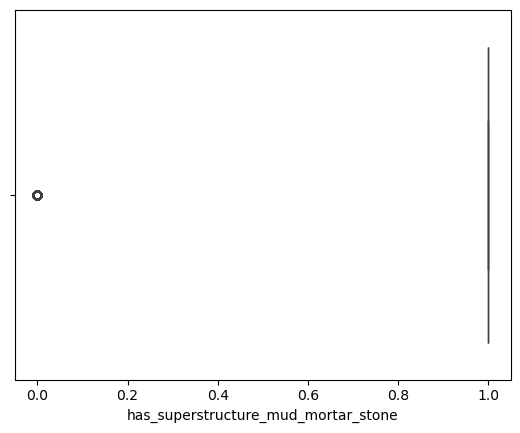

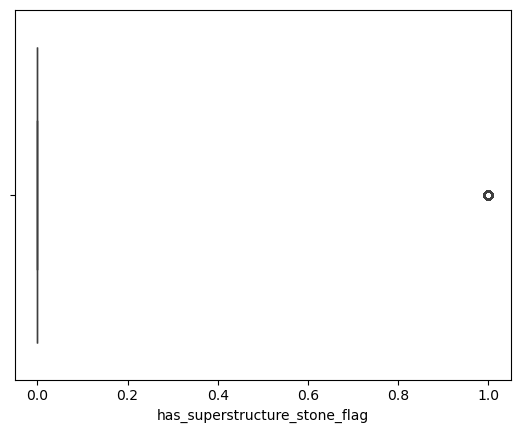

In [86]:
a=num_col.columns[0:10]
for i in a:
    
    sns.boxplot(x=x[i],data=x)
    plt.show()

In [12]:
for i in num_col:
    q1=x[i].quantile(0.25)
    q3=x[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-((iqr)*(1.5))
    upper_bound=q3+((iqr)*(1.5))
    x.loc[x[i]<lower_bound,i]=lower_bound
    x.loc[x[i]>upper_bound,i]=upper_bound

C:\Users\golla\AppData\Local\Temp\ipykernel_20948\2056652465.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6435.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[x[i]<lower_bound,i]=lower_bound
C:\Users\golla\AppData\Local\Temp\ipykernel_20948\2056652465.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[x[i]<lower_bound,i]=lower_bound


## Transformation

In [13]:
for i in num_col:
    a=x[i].skew()
    print(a)

0.2725303547889289
0.028957381391945855
0.00039351208989124153
0.0
0.9338722350344195
0.7206272673518764
0.222694239596095
0.0
0.0
0.0
0.0
0.0
0.0
1.1242929552135028
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [14]:
b=[]
for i in num_col:
    a=x[i].skew()
    if a>0.5 or a<-0.5 :
        b=b+[i]
print(b)

['age', 'area_percentage', 'has_superstructure_timber']


In [15]:
from sklearn .preprocessing import PowerTransformer
trans=PowerTransformer(method="yeo-johnson")
x[b]=trans.fit_transform(x[b])


In [16]:
x[b].skew()

age                         -0.099775
area_percentage             -0.004515
has_superstructure_timber    1.124293
dtype: float64

## pipeline with Scaling , encoding , smothe

In [93]:
y.value_counts()

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

In [17]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [18]:

cat_col_col=cat_col.columns
num_col_col=num_col.columns


In [19]:
cat_pipeline=Pipeline(steps=[("cat",OneHotEncoder())])
num_pipeline=Pipeline(steps=[("num",StandardScaler())])


In [20]:
from sklearn.compose import ColumnTransformer

In [21]:
columntrans=ColumnTransformer(transformers=[("c",cat_pipeline,cat_col_col),("n",num_pipeline,num_col_col)])

In [22]:
columntrans

ColumnTransformer(transformers=[('c',
                                 Pipeline(steps=[('cat', OneHotEncoder())]),
                                 Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')),
                                ('n',
                                 Pipeline(steps=[('num', StandardScaler())]),
                                 Index(['geo_level_1_id', 'geo_level_2_id', 'geo_l...
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object'))])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [24]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=6)

## Logisctic model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_pipeline=Pipeline(steps=[("pre",columntrans),("sm",smote),("model",LogisticRegression())])

In [27]:
model_pipeline

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('c',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')),
                                                 ('n',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  Index(['geo_level_1_id',...
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object'))])),
                ('sm', SMOTE(random_state=6)),
                ('model', LogisticRegression())])

In [106]:
model_pipeline.fit(x_train,y_train)

C:\Users\golla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('c',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')),
                                                 ('n',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  Index(['geo_level_1_id',...
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object'))])),
                ('sm', SMOTE(random_state=6)),
                ('model', LogisticRegression())])

In [107]:
pre=model_pipeline.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test)

0.4834307992202729

In [109]:
pre

array([3, 3, 2, ..., 1, 3, 3])

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_pipeline = Pipeline(steps=[
    ("preprocessor", columntrans),
    ("model", DecisionTreeClassifier(
        max_depth=12,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight="balanced",
        random_state=42
    ))
])

dt_pipeline.fit(x_train, y_train)
y_pred = dt_pipeline.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.6168285981796136

## xgboost model

In [29]:
from xgboost import XGBClassifier


In [30]:
y=y-1

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [32]:
y.value_counts()

damage_grade
1    148259
2     87218
0     25124
Name: count, dtype: int64

In [33]:
xgb_pipeline = Pipeline(steps=[
    ("pe", columntrans),
    ("smote", SMOTE(random_state=42)),
    ("model", XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        eval_metric="mlogloss",
        max_depth=6,
        learning_rate=0.1,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])


In [34]:
xgb_pipeline.fit(x_train,y_train)

Pipeline(steps=[('pe',
                 ColumnTransformer(transformers=[('c',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')),
                                                 ('n',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  Index(['geo_level_1_id', '...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None, num_class=3, ...))])

In [35]:
y_pred = xgb_pipeline.predict(x_test)


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7074181516784086

## hper parameter tuning in xgboost

In [119]:
param_grid = {
    "model__n_estimators": [100],
    "model__max_depth": [6, 8, 10],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__gamma": [0, 1],
}



In [47]:
from collections import Counter
Counter(y_train)

scale_pos_weight = max(Counter(y_train).values()) / min(Counter(y_train).values())

from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

xgb_best = XGBClassifier(
    objective="multi:softprob",
    num_class=3,

    n_estimators=150,
    max_depth=10,
    learning_rate=0.03,

    subsample=0.85,
    colsample_bytree=0.85,

    min_child_weight=1,
    gamma=0.05,

    reg_alpha=0.1,
    reg_lambda=2.0,

    scale_pos_weight=scale_pos_weight,

    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)


pipeline = Pipeline(steps=[
    ("preprocessor", columntrans), 
    ("model", xgb_best)
])

pipeline.fit(x_train, y_train)


C:\Users\golla\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:19:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('c',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')),
                                                 ('n',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  Index(['geo_lev...
                               feature_types=None, feature_weights=None,
                               gamma=0.05, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=-1, num_class=3, ...))])

In [48]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(x_test)
accuracy_score(y_test, y_pred)


0.7186996362296818

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")



0.7209520738383576

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.51      0.58      6319
           1       0.74      0.85      0.79     36998
           2       0.76      0.62      0.69     21834

    accuracy                           0.74     65151
   macro avg       0.73      0.66      0.69     65151
weighted avg       0.74      0.74      0.74     65151



| Model               | Accuracy |
| ------------------- | -------- |
| Logistic Regression | 0.50     |
| Decision Tree       | 0.65     |
| XGBoost             | 0.74     |


XGBoost performed best due to:
- Handling non-linearity
- Robust to class imbalance
- Better generalization


# Suggestions to Seismologists

## Suggestions to Seismologists and Urban Planners

1. Buildings constructed with mud mortar and adobe materials show significantly higher damage.
   → These materials should be avoided in seismic zones.

2. Older buildings are more vulnerable to earthquake damage.
   → Retrofitting and reinforcement of old buildings is recommended.

3. Buildings with more floors experienced greater damage.
   → Floor limits should be enforced in high-risk areas.

4. Engineered reinforced concrete structures performed better.
   → Promote RCC engineered construction.

5. High-risk geographic regions (geo_level_3) require stricter building codes.
   → Region-specific seismic safety regulations are required.


## Suggestions to Reduce Earthquake Damage

1. Avoid mud mortar and adobe construction in high-risk zones.
2. Promote engineered RCC buildings instead of non-engineered RCC.
3. Limit number of floors in earthquake-prone regions.
4. Retrofit old buildings (age > 30 years).
5. Improve foundation standards in weak soil regions.
6. Enforce strict building codes based on geo-level risk.
7. Prioritize hospitals and schools for structural reinforcement.


### Challenges Faced

1. Class imbalance → solved using SMOTE
2. Categorical features → handled using OneHotEncoding
3. Overfitting → controlled using XGBoost regularization
4. Long training time → used tree_method="hist"


In [50]:
import joblib
joblib.dump(pipeline, "model.pkl",compress=3)


['model.pkl']

In [41]:
pipeline.fit(x_train, y_train)


C:\Users\golla\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('c',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')),
                                                 ('n',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  Index(['geo_lev...
                               feature_types=None, feature_weights=None,
                               gamma=0.05, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1, num_class=3, ...))])

In [49]:
joblib.dump(pipeline, "model.pkl")


['model.pkl']

In [62]:
import sklearn
print(sklearn.__version__)

1.6.1


In [67]:
x_train.columns


Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [1]:
import sys
import sklearn
import xgboost
import numpy
import pandas
import joblib

print("Python:", sys.version)
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)

Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
scikit-learn: 1.6.1
xgboost: 3.0.5
numpy: 2.1.3
pandas: 2.2.3
joblib: 1.4.2
